In [1]:
from keras.layers import Input, Conv2D, Activation, UpSampling2D
from keras.models import Model
from keras import optimizers
import keras

In [2]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape))
C1 = Conv2D(64,(9,9),padding='SAME',name='CONV1')(input_img)
A1 = Activation('relu', name='act1')(C1)
C2 = Conv2D(32,(1,1),padding='SAME',name='CONV2')(A1)
A2 = Activation('relu', name='act2')(C2)
C3 = Conv2D(1,(5,5),padding='SAME',name='CONV3')(A2)
A3 = Activation('relu', name='act3')(C3)
U = UpSampling2D((2, 2), interpolation='bilinear')(A3)
model = Model(input_img, U)
opt = optimizers.Adam(lr=0.0003)
model.compile(optimizer=opt,loss='mean_squared_error')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 32, 32, 64)        5248      
_________________________________________________________________
act1 (Activation)            (None, 32, 32, 64)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 32, 32, 32)        2080      
_________________________________________________________________
act2 (Activation)            (None, 32, 32, 32)        0         
_________________________________________________________________
CONV3 (Conv2D)               (None, 32, 32, 1)         801       
_________________________________________________________________
act3 (Activation)            (None, 32, 32, 1)        

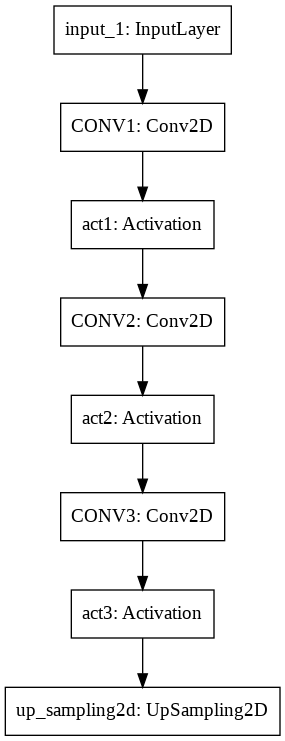

In [3]:
keras.utils.plot_model(model, 'my_first_model.png')

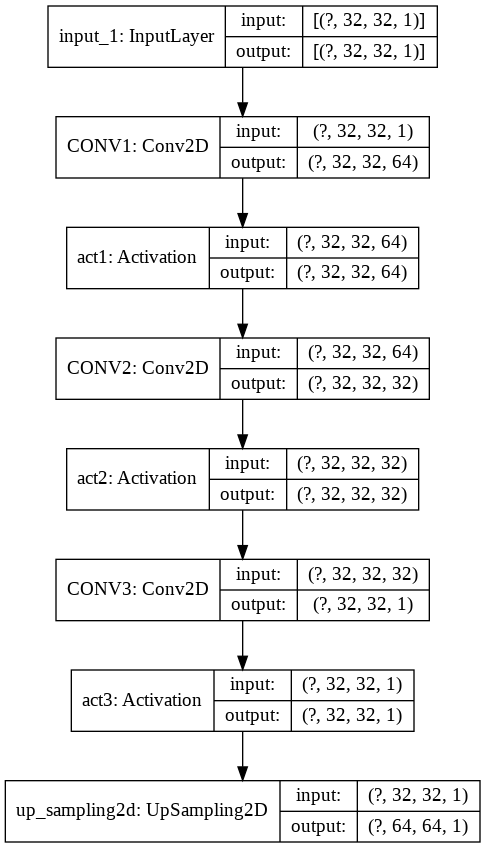

In [4]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)